In [1]:
%pylab inline
import pandas as pd
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from pyemma.thermo import tram

rc('font', family='serif', size=20)

Populating the interactive namespace from numpy and matplotlib


In [2]:
top_un_file = 'm_3681_4nco.pdb'
top_li_file = 'm_3681_3j70.pdb'
traj_list = ['pro.xtc']

D:\ProgramData\Anaconda3\envs\python27\lib\site-packages\pyemma\__init__.py:91: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.1, you have 2.4.
  .format(latest=latest, current=current), category=UserWarning)


In [3]:
feat = coor.featurizer(top_un_file)
feat.add_minrmsd_to_ref(top_un_file, ref_frame=0)
feat.add_minrmsd_to_ref(top_li_file, ref_frame=0)
feat.add_backbone_torsions(cossin=True)
print feat.dimension()

1878


In [4]:
inp = coor.source(traj_list, feat,chunk_size=5000)
print('number of trajectories = ',inp.number_of_trajectories())
print('trajectory length = ',inp.trajectory_length(0))
print('trajectory time step = ',500.0 / (inp.trajectory_length(0)-1),'ns')
print('number of dimension = ',inp.dimension())

('number of trajectories = ', 1)
('trajectory length = ', 2392)
('trajectory time step = ', 0.20911752404851527, 'ns')
('number of dimension = ', 1878)


In [97]:
n_clusters = 150
clustering = coor.cluster_kmeans(inp.get_output(),k=n_clusters)

kmeans iterations:  60% ( 6/10) [###################              ] eta 00:10 |14-03-18 10:15:24 pyemma.coordinates.clustering.kmeans.KmeansClustering[5] INFO     Cluster centers converged after 7 steps.
kmeans iterations: 100% (10/10) [#################################] eta 00:07 \

In [98]:
# dtrajs: index of Markov states
dtraj = clustering.dtrajs

In [83]:
import sys
def ProgressBar(index,length):
    #sys.stdout.write('{}\r'.format(' '* 50))
    #sys.stdout.flush()
    progresschar1 = '#' * int(float(index)/(length-1)*50)
    progresschar2 = '{} {:.2f}%'.format('-\\|/ '[i%5],float(index)/(length-1)*100)
    progresschar3 = ' '* (50-len(progresschar1)) 
    sys.stdout.write('[{}]{}\r'.format(progresschar1+progresschar3,progresschar2))
    sys.stdout.flush()

In [86]:
T = 2392
K = len(dtraj[0])
colvar_files = ['driver_bias_03_02/COLVAR_driver_bias_{}'.format(i) for i in range(0,T,1)]
bias = []
for i,f in enumerate(colvar_files):
    colvar = pd.read_csv(f,sep=r'\s*', header=None, comment='#',engine='python')
    colvar.columns = ['time','cm2unlig','cm2lig','meta.bias','meta.work']
    bias.append(colvar['meta.bias'][:])
    ProgressBar(i,T)

In [99]:
ttrajs = [np.array([T-1 for i in range(K)])]
dtrajs = [np.array(dtraj[0])]
btrajs = [np.array(bias).T]

In [100]:
np.array(btrajs).shape,np.array(ttrajs).shape,np.array(dtrajs).shape
#(1,K,T)             (1,T)                      (1,K)

((1L, 2392L, 2392L), (1L, 2392L), (1L, 2392L))

In [101]:
tram_obj = tram(ttrajs,dtrajs,btrajs, 1,maxiter=10000)

TRAM: 100% (10000/10000) [##################################################] \

In [102]:
tram_obj.log_likelihood()

6917.691836578461

In [103]:
n = 0
for M in tram_obj.models:
    print M.transition_matrix
    if len(M.transition_matrix[0]) > 1:
        n+=1
print n

[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]

[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]

In [104]:
M = tram_obj.models[-1]

In [105]:
M.transition_matrix

array([[0.85714286, 0.        , 0.0952381 , 0.04761905],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.08333333, 0.        , 0.91666667, 0.        ],
       [0.13333333, 0.06666667, 0.        , 0.8       ]])

In [106]:
M.stationary_distribution

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.39252336, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01869159, 0.        , 0.        , 0.        , 0.     

(<matplotlib.figure.Figure at 0x72bff748>, array([[0.47527575, 0.83227562],
        [1.        , 0.        ],
        [0.        , 0.58705233],
        [0.9811384 , 0.5344927 ]]))

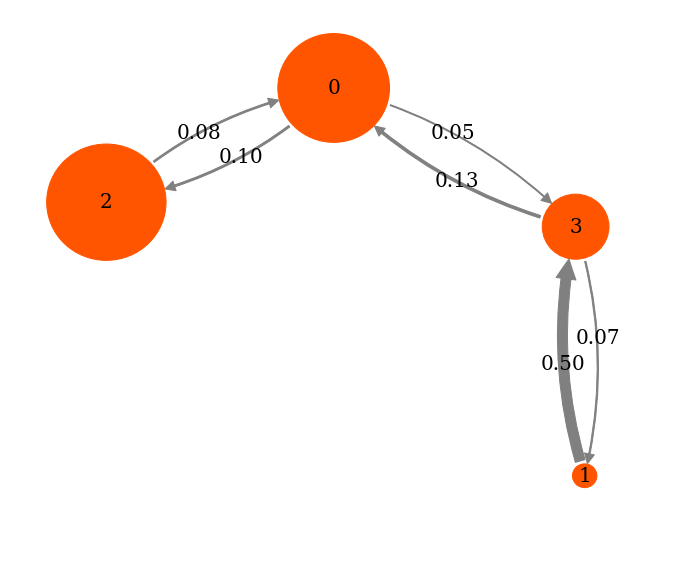

In [108]:
mplt.plot_markov_model(M,arrow_label_format='%.2f')
#这的圆圈数量跟前面的n_clusters有关

In [96]:
dir(M)

['P',
 '_P',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_active_set',
 '_assert_in_active',
 '_assert_metastable',
 '_committor_backward',
 '_committor_forward',
 '_compute_eigendecomposition',
 '_compute_eigenvalues',
 '_dt_model',
 '_ensure_eigendecomposition',
 '_ensure_eigenvalues',
 '_get_model_param_names',
 '_mfpt',
 '_neig',
 '_nstates',
 '_nstates_full',
 '_pi',
 '_reversible',
 '_sparse',
 '_timeunit_model',
 'active_set',
 'committor_backward',
 'committor_forward',
 'correlation',
 'dt_model',
 'eigenvalues',
 'eigenvectors_left',
 'eigenvectors_left_full_state',
 'eigenvectors_right',
 'eigenvectors_right_full_state',
 'expectation',
 'f',
 'f_full_state',
 'fingerprint_correlation',
 'fingerprint_relaxation',
 'free_energies',
 'free_energies_full